In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/archive (5).zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls "/content/archive (5)/data"


with_mask  without_mask


In [ ]:
#!rm -rf "/content/data" # i got another data folder inside data, we removed it using this command entirely and re run the above command


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image #image processing library
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/archive (5)/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3226.jpg', 'with_mask_1036.jpg', 'with_mask_1937.jpg', 'with_mask_2342.jpg', 'with_mask_3259.jpg']
['with_mask_441.jpg', 'with_mask_1020.jpg', 'with_mask_583.jpg', 'with_mask_2947.jpg', 'with_mask_2018.jpg']


In [ ]:
without_mask_files = os.listdir('/content/archive (5)/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_548.jpg', 'without_mask_3593.jpg', 'without_mask_3733.jpg', 'without_mask_2181.jpg', 'without_mask_2786.jpg']
['without_mask_1731.jpg', 'without_mask_2577.jpg', 'without_mask_115.jpg', 'without_mask_1979.jpg', 'without_mask_3017.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
#creating labels for both the image classes

In [ ]:


with_mask_labels = [1]*3725 #inplace of the number 3725 you can also give as len(wihth_mask_files)

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:]) #just checking whether they got converted or not and whether they are equal or not

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying iamges now


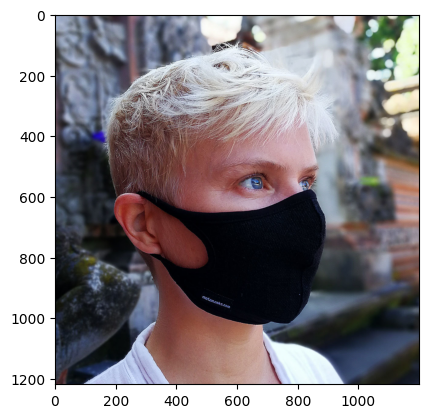

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/archive (5)/data/with_mask/with_mask_3350.jpg') #imread converts into array
imgplot = plt.imshow(img)
plt.show()

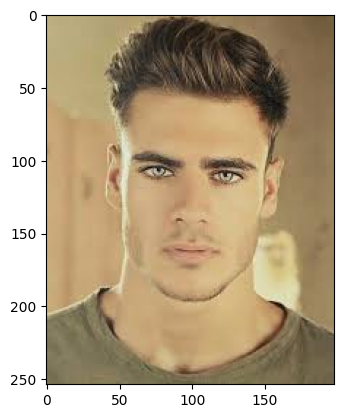

In [ ]:
# without mask image
img = mpimg.imread('/content/archive (5)/data/without_mask/without_mask_593.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#image processing we will 1) resize the images
#2) convert it to numpy arrays


In [ ]:
# convert images to numpy arrays

with_mask_path = '/content/archive (5)/data/with_mask/' #here after mask word we add '/' so that jpg bolke extension will else everything will get mixed with extension and gives directory errpr

data = [] #empty list

for img_file in with_mask_files: #with for loop we want to read all the images

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image) #converting to numpy array
  data.append(image)



without_mask_path = '/content/archive (5)/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [253, 254, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [252, 254, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 254, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)
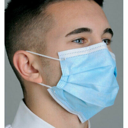

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
#NOW TRAIN-TEST-SPLIT PROCESS

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) #0.2 boletho 20% of data

In [ ]:
print(X.shape, X_train.shape, X_test.shape) #original,train and test we printed

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data ( picture is color picture so, all the values ranges between 0 and 255..now we want to make it come between range of 0 and 1)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
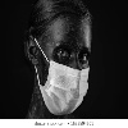

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       [[0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       [[0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [ ]:
#NOW BUILDING CNN

In [ ]:
import tensorflow as tf #TENSOR MODULE MEIN SE WE ARE IMPORTING KERAS LIBRARY
from tensorflow import keras #KERAS EITHER NEEDS TENSORFLOW OR PYTORCH AS BACKEND

In [ ]:
num_of_classes = 2

model = keras.Sequential() #sequential is to stack the layers
#now we are adding layers

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']) #acc is accuracy

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - acc: 0.7032 - loss: 0.7466 - val_acc: 0.8628 - val_loss: 0.3326
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8714 - loss: 0.3224 - val_acc: 0.8876 - val_loss: 0.2475
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9068 - loss: 0.2436 - val_acc: 0.8893 - val_loss: 0.2569
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9143 - loss: 0.2098 - val_acc: 0.9174 - val_loss: 0.2143
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9347 - loss: 0.1739 - val_acc: 0.9140 - val_loss: 0.2301


In [ ]:
#model evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9203 - loss: 0.2147
Test Accuracy = 0.9225678443908691


In [ ]:
#now we will see the loss value and accuracy value in form of visuals/plots


In [ ]:
#this is why we used "history"..so that it can remeber how all the values changed and all

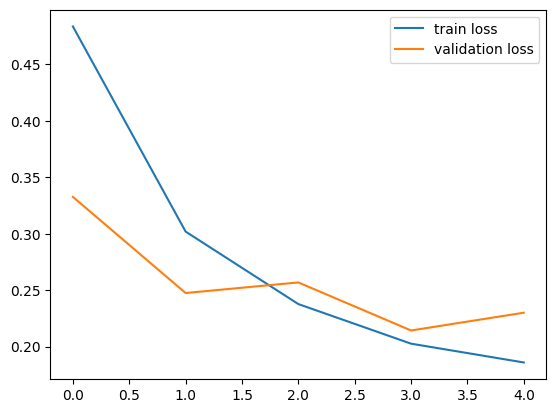

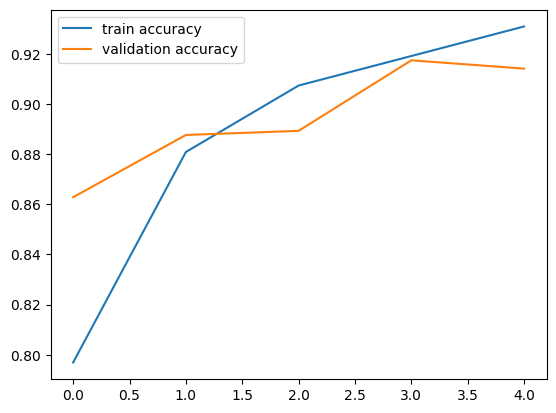

In [ ]:
h = history

#loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Creating an interface or a system to work with





Path of the image to be predicted: /content/thomas tt.jpg


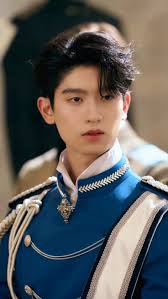

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.4228465 0.5875854]]
1
The person in the image provided is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image provided is wearing a mask')

else:

  print('The person in the image provided is not wearing a mask')